# BDDA_Project 2

### Submitted by:

#### 1. Janessa Karra (035028)

#### 2. Prabhleen Kaur Pahwa (035039)

#### 3. Tanmay Aggarwal (035058)

### DEPENDENCIES

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder # For Encoding Categorical Data [Nominal | Ordinal]
from sklearn.preprocessing import OneHotEncoder # For Creating Dummy Variables of Categorical Data [Nominal]
from sklearn.impute import SimpleImputer, KNNImputer # For Imputation of Missing Data
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler # For Rescaling Data
from sklearn.model_selection import train_test_split # For Splitting Data into Training & Testing Sets 
import seaborn as sns 
import matplotlib.pyplot as plt # For Data Visualization
import scipy.cluster.hierarchy as sch # For Hierarchical Clustering
from sklearn.cluster import AgglomerativeClustering as agclus, KMeans as kmclus # For Agglomerative & K-Means Clustering
from sklearn.metrics import silhouette_score as sscore, davies_bouldin_score as dbscore # For Clustering Model Evaluation
from sklearn.model_selection import train_test_split # For Splitting Data into Training & Testing Sets
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree  # For Decision Tree Model
from sklearn.metrics import confusion_matrix, classification_report # For Decision Tree Model Evaluation
import plotly.express as px
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram

### GET DATA

In [2]:
df = pd.read_csv(r"C:\Users\tanma\5011_5039.csv")
df

,ID,Nationality,Age,DaysSinceCreation,NameHash,DocIDHash,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,...,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom
0,1,PRT,51.0,150,0x8E0A7AF39B633D5EA25C3B7EF4DFC5464B36DB7AF375...,0x71568459B729F7A7ABBED6C781A84CA4274D571003AC...,45,371.0,105.3,1,...,0,0,0,0,0,0,0,0,0,0
1,2,PRT,NaN,1095,0x21EDE41906B45079E75385B5AA33287CA09DE1AB86DE...,0x5FA1E0098A31497057C5A6B9FE9D49FD6DD47CCE7C26...,61,280.0,53.0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,DEU,31.0,1095,0x31C5E4B74E23231295FDB724AD578C02C4A723F4BA2B...,0xC7CF344F5B03295037595B1337AC905CA188F1B5B3A5...,0,0.0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,FRA,60.0,1095,0xFF534C83C0EF23D1CE516BC80A65D0197003D27937D4...,0xBD3823A9B4EC35D6CAF4B27AE423A677C0200DB61E82...,93,240.0,60.0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,FRA,51.0,1095,0x9C1DEF02C9BE242842C1C1ABF2C5AA249A1EEB4763B4...,0xE175754CF77247B202DD0820F49407C762C14A603B3A...,0,0.0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83585,83586,ITA,54.0,0,0x68010434A46BA6CEAFFACF00B7B7CD0E1825DC56E68F...,0x0A4038E9AE1E4E5A14832BEACEC6BCBE2219F275B65C...,0,0.0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
83586,83587,IRL,47.0,0,0x6DE7954E6AF065D29EF5C57D0DC8120FBAE6753D2CCB...,0xC0654B6A53840DD95DAE429966EC16E2A11FB186CC7B...,109,327.1,277.5,0,...,0,0,0,0,1,0,0,0,0,0
83587,83588,IRL,53.0,0,0x533C977BA6D1D8DFAD8D8D4C2250236D16EFD17B9F35...,0x3DCBEB254247836015CA95F0BBF42E6AF6A158380663...,0,0.0,0.0,0,...,0,0,0,0,1,0,0,0,0,0
83588,83589,IRL,85.0,0,0x58B3CB1975F09BD89EDD4DED8F644D1CCBE6B29C10C7...,0xEB64E8E6820F421508B96820AA3BA49404C01D178FE3...,109,981.3,9.0,0,...,0,0,0,0,0,1,0,0,0,0


### ABOUT THE DATA SET

_Data Description:_ The dataset consists of 83,590 customers' records and includes 31 variables that describe their behavior over a period of three years  (2015 to 2018). Along with personal and behavioral data, the dataset also contains demographic and geographical information. All personal related data were transformed or anonymized to guaranty privacy and prevent the hotel or guests’ identification. Time-related variables were accounted for based on the last day of the extraction period. The last day of the extraction period is December 31, 2018.

_Data source location_: The data came from a four-star hotel located in Lisbon, Portugal, Europe. In Portugal, hotels' star classification scale varies from 1 to 5, with one-star being the low-end quality hotels and five-star being the high-end quality hotels.


__Descriptive variables__

1. ID: Cutomer Id, **Numeric** 


2. Nationality: country of origin, **Categorical**


3. Age: customer's age (in years), **Numeric**


4. Name Hash: Name of the customer's SHA2–256 hash string, categorical


5. DocID Hash: SHA2–256 hash-string of the identification document number the customer provided at check-in (passport number, national ID card number, or other), **Categorical**


6. DistributionChannel: **Categorical**


7. MarketSegment: **Categorical**



__Quantifying Variables__


1. Average Lead Time: The average number of days elapsed between the customer's booking date and arrival date. In other words, this variable is calculated by dividing the sum of the number of days elapsed between the moment each booking was made and its arrival date, by the total of bookings made by the customer, **Numeric**


2. Lodging Revenue: Total amount spent on lodging expenses by the customer (in Euros). This value includes room, crib, and other related lodging expenses, **Numeric**


3. Other Revenue: Total amount spent on other expenses by the customer (in Euros). This value includes food, beverage, spa, and other expenses, **Numeric**


4. Bookings Canceled: Number of bookings the customer made but subsequently canceled (the costumer informed the hotel he/she would not come to stay), **Numeric**


5. Bookings No Showed: Number of bookings the customer made but subsequently made a “no-show” (did not cancel, but did not check-in to stay at the hotel),  **Numeric**


6. Bookings CheckedIn: Number of bookings the customer made, and which end up with a staying, **Numeric**


7. Persons Nights: The total number of persons/nights that the costumer stayed at the hotel. This value is calculated by summing all customers checked-in bookings’ persons/nights. Person/nights of each booking is the result of the multiplication of the number of staying nights by the sum of adults and children, **Numeric**


8. Room Nights: Total of room/nights the customer stayed at the hotel (checked-in bookings). Room/nights are the multiplication of the number of rooms of each booking by the number of nights of the booking, **Numeric**


9. Days Since Last Stay: The number of days elapsed between the last day of the extraction and the customer's last arrival date (of a checked-in booking). A value of −1 indicates the customer never stayed at the hotel, **Numeric**


10. Days Since First Stay: The number of days elapsed between the last day of the extraction and the customer's first arrival date (of a checked-in booking). A value of −1 indicates the customer never stayed at the hotel, **Numeric**


11. SR High Floor: Indication if the customer usually asks for a room on a higher floor (0: No, 1: Yes), **Boolean**


12. SR Low Floor: Indication if the customer usually asks for a room on a lower floor (0: No, 1: Yes), **Boolean**


13. SR Accessible Room: Indication if the customer usually asks for an accessible room (0: No, 1: Yes), **Boolean**


14. SR Medium Floor: Indication if the customer usually asks for a room on a middle floor (0: No, 1: Yes), **Boolean**


15. SR Bath tub: Indication if the customer usually asks for a room with a bathtub (0: No, 1: Yes), **Boolean**


16. SR Shower: Indication if the customer usually asks for a room with a shower (0: No, 1: Yes), **Boolean**


17. SR Crib: Indication if the customer usually asks for a crib (0: No, 1: Yes), **Boolean**


18. SR KingSizeBed: Indication if the customer usually asks for a room with a king-size bed (0: No, 1: Yes), **Boolean**


19. SR TwinBed Indication if the customer usually asks for a room with a twin bed (0: No, 1: Yes), **Boolean**


20. SR Near Elevator: Indication if the customer usually asks for a room near the elevator (0: No, 1: Yes), **Boolean**


21. SR AwayFromElevator: Indication if the customer usually asks for a room away from the elevator (0: No, 1: Yes), **Boolean**


22. SR No Alcohol In MiniBar: Indication if the customer usually asks for a room with no alcohol in the mini-bar (0: No, 1: Yes),**Boolean**


23. SR Quiet Room: Indication if the customer usually asks for a room away from the noise (0: No, 1: Yes), **Boolean**

In [3]:
df.columns

Index(['ID', 'Nationality', 'Age', 'DaysSinceCreation', 'NameHash',
       'DocIDHash', 'AverageLeadTime', 'LodgingRevenue', 'OtherRevenue',
       'BookingsCanceled', 'BookingsNoShowed', 'BookingsCheckedIn',
       'PersonsNights', 'RoomNights', 'DaysSinceLastStay',
       'DaysSinceFirstStay', 'DistributionChannel', 'MarketSegment',
       'SRHighFloor', 'SRLowFloor', 'SRAccessibleRoom', 'SRMediumFloor',
       'SRBathtub', 'SRShower', 'SRCrib', 'SRKingSizeBed', 'SRTwinBed',
       'SRNearElevator', 'SRAwayFromElevator', 'SRNoAlcoholInMiniBar',
       'SRQuietRoom'],
      dtype='object')

In [4]:
df_noncat = df[['Age','DaysSinceCreation','AverageLeadTime', 'LodgingRevenue', 'OtherRevenue',
       'BookingsCanceled', 'BookingsNoShowed', 'BookingsCheckedIn',
       'PersonsNights', 'RoomNights', 'DaysSinceLastStay',
       'DaysSinceFirstStay']]
df_cat = df[['Nationality','DistributionChannel', 'MarketSegment',
       'SRHighFloor', 'SRLowFloor', 'SRAccessibleRoom', 'SRMediumFloor',
       'SRBathtub', 'SRShower', 'SRCrib', 'SRKingSizeBed', 'SRTwinBed',
       'SRNearElevator', 'SRAwayFromElevator', 'SRNoAlcoholInMiniBar',
       'SRQuietRoom']]

## Descriptive Analysis of the Dataset

#### OBJECTIVES

1. To understand the descriptive statistics of the non-categorical (non-cat) variables in the dataset

In [5]:
df_noncat.describe()

,Age,DaysSinceCreation,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,PersonsNights,RoomNights,DaysSinceLastStay,DaysSinceFirstStay
count,79811.000000,83590.000000,83590.000000,83590.000000,83590.000000,83590.000000,83590.000000,83590.000000,83590.000000,83590.000000,83590.000000,83590.000000
mean,45.398028,453.640902,66.196028,298.802087,67.589132,0.002022,0.000634,0.794617,4.649133,2.358536,401.067137,403.349013
std,16.572368,313.390291,87.758990,372.851892,114.327776,0.066770,0.029545,0.695778,4.567673,2.281746,347.204955,347.971089
min,-11.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000
25%,34.000000,177.000000,0.000000,59.000000,2.000000,0.000000,0.000000,1.000000,1.000000,1.000000,26.000000,27.000000
50%,46.000000,397.000000,29.000000,234.000000,38.500000,0.000000,0.000000,1.000000,4.000000,2.000000,366.000000,369.000000
75%,57.000000,723.000000,103.000000,402.000000,87.675000,0.000000,0.000000,1.000000,6.000000,4.000000,693.000000,697.000000
max,122.000000,1095.000000,588.000000,21781.000000,7730.250000,9.000000,3.000000,66.000000,116.000000,185.000000,1104.000000,1186.000000


#### MAIN OBSERVATIONS

1. Average age of the respondents is 45 years

2. Average led time of all the respondents being converted to actual revenue brining customers is 66 days 

3. Average lodging revenue for 3 years is Dolar 299 and average of the revenue coming from other sources is Dolar 67 for 3 years 

4. Booking Cancelled and Booking no show rates are almost negligable, indicating that the converation rate is high for the hotel

5. Day since last stay and first stay go hand in hand, there is hardly any difference in their average values 

####  INFERENCES

1.	The hotel can tailor its services and marketing strategies to attract customers in the age group of 45 years. This could include offering amenities and activities that are popular among this age group, such as spa treatments, fitness classes, and cultural experiences.


2.	The reasons for the long led time can be analysed and steps can be taken to reduce it, such as streamlining the booking process, improving communication with customers, and offering incentives for early booking.


3.	The hotel can also analyze the revenue sources and explore ways to increase the revenue from other sources, such as food and beverage sales, event bookings, and merchandise sales. This could include offering unique and high-quality products and experiences that differentiate the hotel from competitors.


4.	The high conversion rate indicates that the hotel is doing a good job of converting bookings into actual revenue. The hotel can continue to focus on providing excellent customer service, personalized experiences, and competitive pricing to maintain and increase its conversion rate.


5.	The similarity in the average values of the day since last stay and first stay suggests that the hotel has a loyal customer base. The hotel can continue to build and strengthen its relationships with existing customers by offering loyalty programs, personalized recommendations, and special promotions. The hotel can also encourage customers to refer their friends and family to increase the customer base.


# Data Pre-Processing

#### __OBJECTIVES:__

1. Identifying the null values in both cat and non-cat datasets 

2. Treating the null values by imputation

3. Numeric coding of cat variables

4. Identifying outliers using boxplots 

5. Treating the outliers

6. Combining the pre-processed cat and non-cat dataframes into one (df_ppd)

6. Diving the combined pre-processed dataset (df_ppd) into two, testing and training datasets (test_df and train_df)


#### __Brief on Analysis:__

1. The null values in the datasets were indentified using the info() functions 

2. These null values were then treated using Simple Imputer with strategy as 'mean'

3. Numeric encoding of the categorical variables (Distribution Channel and Market Segment) was done using Label Encoder as the data was nominal

4. After identifying the outliers in each variable, they were treated using Normalization -> Min-Max Scaling

5. The cat and non_cat pre-processed datasets were then merged into one using the 'merge' function.

In [6]:
df_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83590 entries, 0 to 83589
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Nationality           83590 non-null  object
 1   DistributionChannel   83590 non-null  object
 2   MarketSegment         83590 non-null  object
 3   SRHighFloor           83590 non-null  int64 
 4   SRLowFloor            83590 non-null  int64 
 5   SRAccessibleRoom      83590 non-null  int64 
 6   SRMediumFloor         83590 non-null  int64 
 7   SRBathtub             83590 non-null  int64 
 8   SRShower              83590 non-null  int64 
 9   SRCrib                83590 non-null  int64 
 10  SRKingSizeBed         83590 non-null  int64 
 11  SRTwinBed             83590 non-null  int64 
 12  SRNearElevator        83590 non-null  int64 
 13  SRAwayFromElevator    83590 non-null  int64 
 14  SRNoAlcoholInMiniBar  83590 non-null  int64 
 15  SRQuietRoom           83590 non-null

In [7]:
df_noncat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83590 entries, 0 to 83589
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 79811 non-null  float64
 1   DaysSinceCreation   83590 non-null  int64  
 2   AverageLeadTime     83590 non-null  int64  
 3   LodgingRevenue      83590 non-null  float64
 4   OtherRevenue        83590 non-null  float64
 5   BookingsCanceled    83590 non-null  int64  
 6   BookingsNoShowed    83590 non-null  int64  
 7   BookingsCheckedIn   83590 non-null  int64  
 8   PersonsNights       83590 non-null  int64  
 9   RoomNights          83590 non-null  int64  
 10  DaysSinceLastStay   83590 non-null  int64  
 11  DaysSinceFirstStay  83590 non-null  int64  
dtypes: float64(3), int64(9)
memory usage: 7.7 MB


__Since, only the 'Age' variable in the non-cat dataset has missing values, it has been treated by simple imputer in the following code.__ 

##### Missing data Imputation

In [8]:
si_noncat = SimpleImputer(missing_values=np.nan, strategy='mean')
si_noncat_fit = si_noncat.fit_transform(df_noncat)
df_noncat_mdi_si = pd.DataFrame(si_noncat_fit, columns=df_noncat.columns)
df_noncat_mdi_si.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83590 entries, 0 to 83589
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 83590 non-null  float64
 1   DaysSinceCreation   83590 non-null  float64
 2   AverageLeadTime     83590 non-null  float64
 3   LodgingRevenue      83590 non-null  float64
 4   OtherRevenue        83590 non-null  float64
 5   BookingsCanceled    83590 non-null  float64
 6   BookingsNoShowed    83590 non-null  float64
 7   BookingsCheckedIn   83590 non-null  float64
 8   PersonsNights       83590 non-null  float64
 9   RoomNights          83590 non-null  float64
 10  DaysSinceLastStay   83590 non-null  float64
 11  DaysSinceFirstStay  83590 non-null  float64
dtypes: float64(12)
memory usage: 7.7 MB


##### Data encoding

Data encoding was done for 'Ditribution Channel' and 'Market Segment Channel' because these variables directly help in describing the customers and understand their behavior. 

In [9]:
df_cat_code = df_cat.copy()

In [10]:
# Using Scikit Learn : Label Encoder (Inferior)
le = LabelEncoder()
le_fit1 = le.fit_transform(df_cat_code['DistributionChannel'])
le_fit2 = le.fit_transform(df_cat_code['MarketSegment'])
df_gen_code = pd.DataFrame(le_fit1, columns=['DistributionChannel_code']); df_gen_code
df_edu_code = pd.DataFrame(le_fit2, columns=['MarketSegment_code']); df_edu_code
df_gen_edu_code = df_gen_code.join(df_edu_code); df_gen_edu_code
df_cat_code_le = df_cat_code.join(df_gen_edu_code); df_cat_code_le # (Missing Data Treated) Numeric Coded Categorical Dataset using Scikit Learn Label Encoder

,Nationality,DistributionChannel,MarketSegment,SRHighFloor,SRLowFloor,SRAccessibleRoom,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom,DistributionChannel_code,MarketSegment_code
0,PRT,Corporate,Corporate,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
1,PRT,Travel Agent/Operator,Travel Agent/Operator,0,0,0,0,0,0,0,0,0,0,0,0,0,3,6
2,DEU,Travel Agent/Operator,Travel Agent/Operator,0,0,0,0,0,0,0,0,0,0,0,0,0,3,6
3,FRA,Travel Agent/Operator,Travel Agent/Operator,0,0,0,0,0,0,0,0,0,0,0,0,0,3,6
4,FRA,Travel Agent/Operator,Travel Agent/Operator,0,0,0,0,0,0,0,0,0,0,0,0,0,3,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83585,ITA,Travel Agent/Operator,Other,0,0,0,0,0,0,0,0,0,0,0,0,0,3,5
83586,IRL,Travel Agent/Operator,Other,0,0,0,0,0,0,0,1,0,0,0,0,0,3,5
83587,IRL,Travel Agent/Operator,Other,0,0,0,0,0,0,0,1,0,0,0,0,0,3,5
83588,IRL,Travel Agent/Operator,Other,0,0,0,0,0,0,0,0,1,0,0,0,0,3,5


#### Visualising the outliers

Box plots for all the non-cat variables was constructed to identify which variable contains the outliers. 

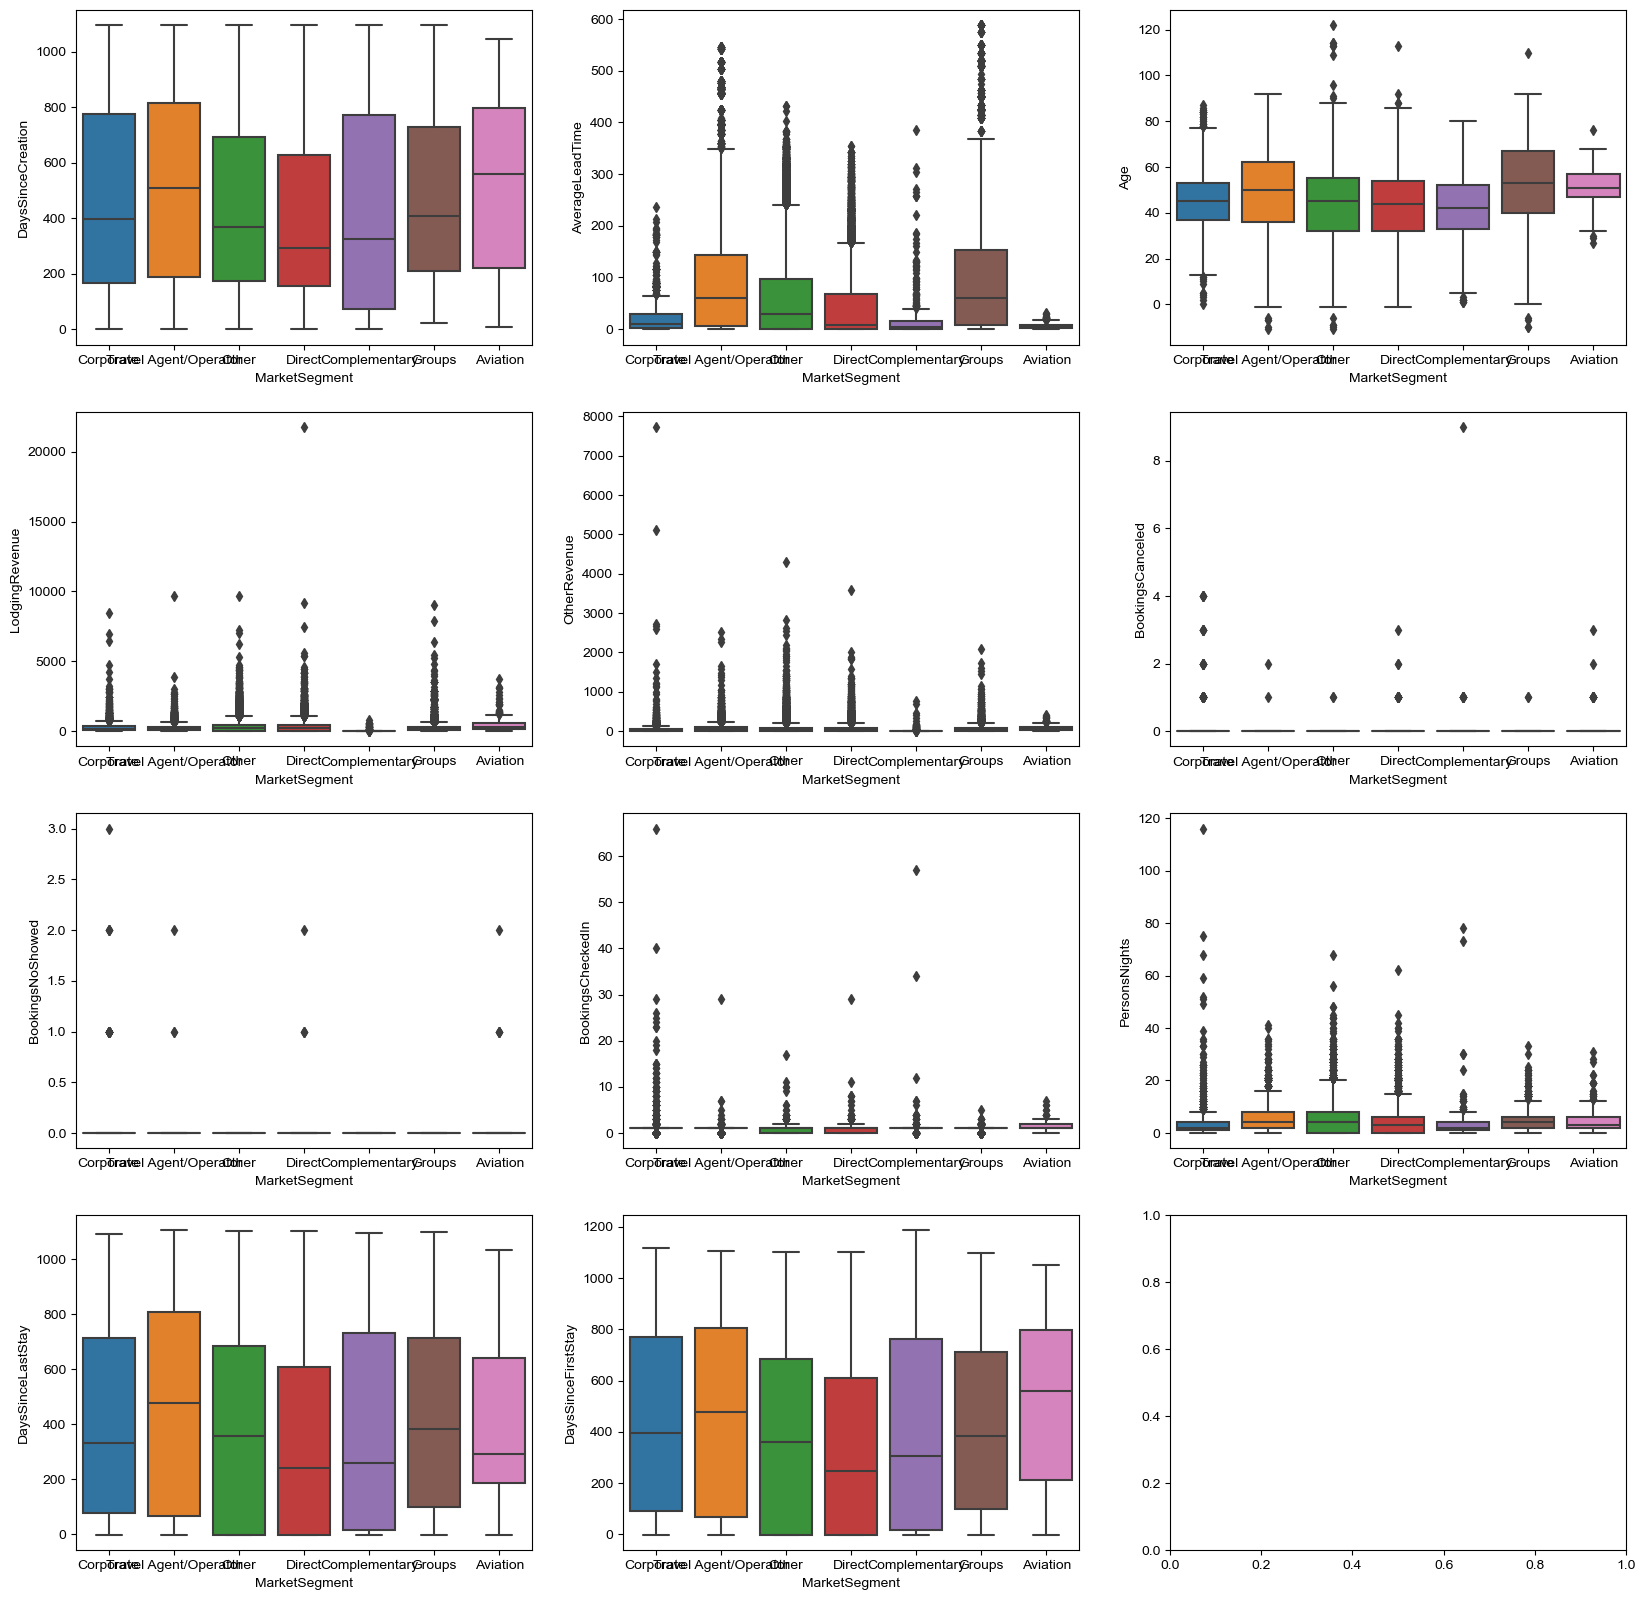

In [11]:
f , axes = plt.subplots(4,3, figsize = (20, 20)) 

sns.set_style("darkgrid")

fig1 = sns.boxplot(data=df, x='MarketSegment', y='DaysSinceCreation', ax = axes[0,0])

fig2 = sns.boxplot(data=df, x='MarketSegment', y='AverageLeadTime', ax = axes [0,1])

fig3 = sns.boxplot(data=df, x='MarketSegment', y='Age', ax = axes [0,2])

fig4 = sns.boxplot(data=df, x='MarketSegment', y='LodgingRevenue', ax = axes [1,0])

fig5 = sns.boxplot(data=df, x='MarketSegment', y='OtherRevenue', ax = axes [1,1])

fig6 = sns.boxplot(data=df, x='MarketSegment', y='BookingsCanceled', ax = axes [1,2])

fig7 = sns.boxplot(data=df, x='MarketSegment', y='BookingsNoShowed', ax = axes [2,0])

fig8 = sns.boxplot(data=df, x='MarketSegment', y='BookingsCheckedIn', ax = axes [2,1])

fig9 = sns.boxplot(data=df, x='MarketSegment', y='PersonsNights', ax = axes [2,2])

fig10 = sns.boxplot(data=df, x='MarketSegment', y='DaysSinceLastStay', ax = axes [3,0])

fig11= sns.boxplot(data=df, x='MarketSegment', y='DaysSinceFirstStay', ax = axes [3,1])


##### Observation: 

From the above box plots, it can be clearly seen that 'AverageLeadTime', 'Age', 'LodgingRevenue', 'OtherRevenue',     'BookingsCanceled', 'BookingsNoShowed', 'BookingsCheckedIn' and 'PersonsNights' are the variables that contain the outliers. Hence, using normalisation we will be treating these outliers. 

##### Outlier data treatment

In [12]:
# Normalization : Min-Max Scaling
mms = MinMaxScaler()
mms_fit = mms.fit_transform(df_noncat_mdi_si[['AverageLeadTime', 'Age', 'LodgingRevenue', 'OtherRevenue', 
                                              'BookingsCanceled', 'BookingsNoShowed', 'BookingsCheckedIn', 'PersonsNights']])
df_noncat_minmax_norm = pd.DataFrame(mms_fit, columns=['Age_norm', 'AverageleadTime_norm', 'LodgingRevenue_norm', 
                                                       'OtherRevenue_norm', 'BookingsCanceled_norm', 'BookingsNoShowed_norm',
                                                      'BookingsCheckedIn_norm', 'PersonsNights_norm'])
df_noncat_minmax_norm
df_noncat_mdt_mmn = df_noncat_mdi_si.join(df_noncat_minmax_norm); df_noncat_mdt_mmn # (Missing Data Treated) Normalized Non-Categorical Dataset using Sikit Learn Min-Max Scaler

,Age,DaysSinceCreation,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,PersonsNights,RoomNights,DaysSinceLastStay,DaysSinceFirstStay,Age_norm,AverageleadTime_norm,LodgingRevenue_norm,OtherRevenue_norm,BookingsCanceled_norm,BookingsNoShowed_norm,BookingsCheckedIn_norm,PersonsNights_norm
0,51.000000,150.0,45.0,371.0,105.3,1.0,0.0,3.0,8.0,5.0,151.0,1074.0,0.078098,0.466165,0.017033,0.013622,0.111111,0.0,0.045455,0.068966
1,45.398028,1095.0,61.0,280.0,53.0,0.0,0.0,1.0,10.0,5.0,1100.0,1100.0,0.105263,0.424045,0.012855,0.006856,0.000000,0.0,0.015152,0.086207
2,31.000000,1095.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,-1.0,0.001698,0.315789,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
3,60.000000,1095.0,93.0,240.0,60.0,0.0,0.0,1.0,10.0,5.0,1100.0,1100.0,0.159593,0.533835,0.011019,0.007762,0.000000,0.0,0.015152,0.086207
4,51.000000,1095.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,-1.0,0.001698,0.466165,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83585,54.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,-1.0,0.001698,0.488722,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
83586,47.000000,0.0,109.0,327.1,277.5,0.0,0.0,1.0,6.0,3.0,3.0,3.0,0.186757,0.436090,0.015018,0.035898,0.000000,0.0,0.015152,0.051724
83587,53.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,-1.0,0.001698,0.481203,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
83588,85.000000,0.0,109.0,981.3,9.0,0.0,0.0,1.0,6.0,3.0,3.0,3.0,0.186757,0.721805,0.045053,0.001164,0.000000,0.0,0.015152,0.051724


##### Combining the pre-processed cat and non-cat dataframes into one dataframe

In [13]:
df_cat_ppd = df_cat_code_le.copy(); df_cat_ppd # Preferred Data Subset
df_noncat_ppd = df_noncat_mdt_mmn.copy(); df_noncat_ppd # Preferred Data Subset
df_ppd = pd.merge(df_cat_ppd, df_noncat_ppd, left_index=True, right_index=True); df_ppd

,Nationality,DistributionChannel,MarketSegment,SRHighFloor,SRLowFloor,SRAccessibleRoom,SRMediumFloor,SRBathtub,SRShower,SRCrib,...,DaysSinceLastStay,DaysSinceFirstStay,Age_norm,AverageleadTime_norm,LodgingRevenue_norm,OtherRevenue_norm,BookingsCanceled_norm,BookingsNoShowed_norm,BookingsCheckedIn_norm,PersonsNights_norm
0,PRT,Corporate,Corporate,0,0,0,0,0,0,0,...,151.0,1074.0,0.078098,0.466165,0.017033,0.013622,0.111111,0.0,0.045455,0.068966
1,PRT,Travel Agent/Operator,Travel Agent/Operator,0,0,0,0,0,0,0,...,1100.0,1100.0,0.105263,0.424045,0.012855,0.006856,0.000000,0.0,0.015152,0.086207
2,DEU,Travel Agent/Operator,Travel Agent/Operator,0,0,0,0,0,0,0,...,-1.0,-1.0,0.001698,0.315789,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
3,FRA,Travel Agent/Operator,Travel Agent/Operator,0,0,0,0,0,0,0,...,1100.0,1100.0,0.159593,0.533835,0.011019,0.007762,0.000000,0.0,0.015152,0.086207
4,FRA,Travel Agent/Operator,Travel Agent/Operator,0,0,0,0,0,0,0,...,-1.0,-1.0,0.001698,0.466165,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83585,ITA,Travel Agent/Operator,Other,0,0,0,0,0,0,0,...,-1.0,-1.0,0.001698,0.488722,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
83586,IRL,Travel Agent/Operator,Other,0,0,0,0,0,0,0,...,3.0,3.0,0.186757,0.436090,0.015018,0.035898,0.000000,0.0,0.015152,0.051724
83587,IRL,Travel Agent/Operator,Other,0,0,0,0,0,0,0,...,-1.0,-1.0,0.001698,0.481203,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
83588,IRL,Travel Agent/Operator,Other,0,0,0,0,0,0,0,...,3.0,3.0,0.186757,0.721805,0.045053,0.001164,0.000000,0.0,0.015152,0.051724


In [14]:
df_ppd.columns

Index(['Nationality', 'DistributionChannel', 'MarketSegment', 'SRHighFloor',
       'SRLowFloor', 'SRAccessibleRoom', 'SRMediumFloor', 'SRBathtub',
       'SRShower', 'SRCrib', 'SRKingSizeBed', 'SRTwinBed', 'SRNearElevator',
       'SRAwayFromElevator', 'SRNoAlcoholInMiniBar', 'SRQuietRoom',
       'DistributionChannel_code', 'MarketSegment_code', 'Age',
       'DaysSinceCreation', 'AverageLeadTime', 'LodgingRevenue',
       'OtherRevenue', 'BookingsCanceled', 'BookingsNoShowed',
       'BookingsCheckedIn', 'PersonsNights', 'RoomNights', 'DaysSinceLastStay',
       'DaysSinceFirstStay', 'Age_norm', 'AverageleadTime_norm',
       'LodgingRevenue_norm', 'OtherRevenue_norm', 'BookingsCanceled_norm',
       'BookingsNoShowed_norm', 'BookingsCheckedIn_norm',
       'PersonsNights_norm'],
      dtype='object')

In [15]:
#Keeping only the normalised and numeric encoded varaibles in the data frame for the ease of further analysis
df_ppd1 =df_ppd[['SRHighFloor',
       'SRLowFloor', 'SRAccessibleRoom', 'SRMediumFloor', 'SRBathtub',
       'SRShower', 'SRCrib', 'SRKingSizeBed', 'SRTwinBed', 'SRNearElevator',
       'SRAwayFromElevator', 'SRNoAlcoholInMiniBar', 'SRQuietRoom',
       'DistributionChannel_code', 'MarketSegment_code', 'DaysSinceCreation', 'RoomNights', 'DaysSinceLastStay',
       'DaysSinceFirstStay', 'Age_norm', 'AverageleadTime_norm',
       'LodgingRevenue_norm', 'OtherRevenue_norm', 'BookingsCanceled_norm',
       'BookingsNoShowed_norm', 'BookingsCheckedIn_norm',
       'PersonsNights_norm']]
df_ppd1

,SRHighFloor,SRLowFloor,SRAccessibleRoom,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,...,DaysSinceLastStay,DaysSinceFirstStay,Age_norm,AverageleadTime_norm,LodgingRevenue_norm,OtherRevenue_norm,BookingsCanceled_norm,BookingsNoShowed_norm,BookingsCheckedIn_norm,PersonsNights_norm
0,0,0,0,0,0,0,0,0,0,0,...,151.0,1074.0,0.078098,0.466165,0.017033,0.013622,0.111111,0.0,0.045455,0.068966
1,0,0,0,0,0,0,0,0,0,0,...,1100.0,1100.0,0.105263,0.424045,0.012855,0.006856,0.000000,0.0,0.015152,0.086207
2,0,0,0,0,0,0,0,0,0,0,...,-1.0,-1.0,0.001698,0.315789,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
3,0,0,0,0,0,0,0,0,0,0,...,1100.0,1100.0,0.159593,0.533835,0.011019,0.007762,0.000000,0.0,0.015152,0.086207
4,0,0,0,0,0,0,0,0,0,0,...,-1.0,-1.0,0.001698,0.466165,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83585,0,0,0,0,0,0,0,0,0,0,...,-1.0,-1.0,0.001698,0.488722,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
83586,0,0,0,0,0,0,0,1,0,0,...,3.0,3.0,0.186757,0.436090,0.015018,0.035898,0.000000,0.0,0.015152,0.051724
83587,0,0,0,0,0,0,0,1,0,0,...,-1.0,-1.0,0.001698,0.481203,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
83588,0,0,0,0,0,0,0,0,1,0,...,3.0,3.0,0.186757,0.721805,0.045053,0.001164,0.000000,0.0,0.015152,0.051724


In [16]:
df_ppd1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83590 entries, 0 to 83589
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   SRHighFloor               83590 non-null  int64  
 1   SRLowFloor                83590 non-null  int64  
 2   SRAccessibleRoom          83590 non-null  int64  
 3   SRMediumFloor             83590 non-null  int64  
 4   SRBathtub                 83590 non-null  int64  
 5   SRShower                  83590 non-null  int64  
 6   SRCrib                    83590 non-null  int64  
 7   SRKingSizeBed             83590 non-null  int64  
 8   SRTwinBed                 83590 non-null  int64  
 9   SRNearElevator            83590 non-null  int64  
 10  SRAwayFromElevator        83590 non-null  int64  
 11  SRNoAlcoholInMiniBar      83590 non-null  int64  
 12  SRQuietRoom               83590 non-null  int64  
 13  DistributionChannel_code  83590 non-null  int32  
 14  Market

##### Dividing the dataset into train and testing datasets

In [17]:
train_df, test_df = train_test_split(df_ppd1, test_size=0.25, random_state=1234)
train_df # Training Dataset

,SRHighFloor,SRLowFloor,SRAccessibleRoom,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,...,DaysSinceLastStay,DaysSinceFirstStay,Age_norm,AverageleadTime_norm,LodgingRevenue_norm,OtherRevenue_norm,BookingsCanceled_norm,BookingsNoShowed_norm,BookingsCheckedIn_norm,PersonsNights_norm
37675,0,0,0,0,0,0,0,1,0,0,...,460.0,460.0,0.227504,0.548872,0.011033,0.011707,0.0,0.0,0.015152,0.051724
45162,0,0,0,0,0,0,0,1,0,0,...,-1.0,-1.0,0.001698,0.511278,0.000000,0.000000,0.0,0.0,0.000000,0.000000
40002,0,0,0,0,0,0,0,0,0,0,...,429.0,429.0,0.492360,0.428571,0.010743,0.005433,0.0,0.0,0.015152,0.051724
58044,0,0,0,0,0,0,0,0,0,0,...,-1.0,-1.0,0.001698,0.436090,0.000000,0.000000,0.0,0.0,0.000000,0.000000
65311,0,0,0,0,0,0,0,0,0,0,...,159.0,159.0,0.022071,0.383459,0.003397,0.000906,0.0,0.0,0.015152,0.008621
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32399,1,0,0,0,0,0,0,1,0,0,...,538.0,538.0,0.008489,0.639098,0.012304,0.001811,0.0,0.0,0.015152,0.017241
82584,0,0,0,0,0,0,0,0,0,0,...,18.0,18.0,0.003396,0.406015,0.030869,0.023220,0.0,0.0,0.015152,0.181034
60620,0,0,0,0,0,0,0,0,0,0,...,196.0,196.0,0.018676,0.390977,0.018640,0.001811,0.0,0.0,0.015152,0.034483
34086,0,0,0,0,0,0,0,0,0,0,...,511.0,511.0,0.001698,0.353383,0.006795,0.001811,0.0,0.0,0.015152,0.017241


In [18]:
test_df# Testing Dataset

,SRHighFloor,SRLowFloor,SRAccessibleRoom,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,...,DaysSinceLastStay,DaysSinceFirstStay,Age_norm,AverageleadTime_norm,LodgingRevenue_norm,OtherRevenue_norm,BookingsCanceled_norm,BookingsNoShowed_norm,BookingsCheckedIn_norm,PersonsNights_norm
8406,0,0,0,0,0,0,0,0,0,0,...,929.0,929.0,0.033956,0.383459,0.011313,0.001811,0.0,0.0,0.015152,0.017241
18605,0,0,0,0,0,0,0,1,0,0,...,777.0,777.0,0.033956,0.526316,0.009673,0.012419,0.0,0.0,0.015152,0.068966
71203,0,0,0,0,0,0,0,0,0,0,...,118.0,118.0,0.146010,0.300752,0.020614,0.002717,0.0,0.0,0.015152,0.025862
43816,0,0,0,0,0,0,1,1,0,0,...,-1.0,-1.0,0.001698,0.398496,0.000000,0.000000,0.0,0.0,0.000000,0.000000
12739,0,0,0,0,0,0,0,0,0,0,...,863.0,863.0,0.025467,0.436090,0.033235,0.013971,0.0,0.0,0.015152,0.051724
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75265,0,0,0,0,0,0,0,1,0,0,...,-1.0,-1.0,0.001698,0.360902,0.000000,0.000000,0.0,0.0,0.000000,0.000000
17113,0,0,0,0,0,0,0,1,0,0,...,801.0,801.0,0.001698,0.330827,0.021636,0.012807,0.0,0.0,0.015152,0.103448
70475,1,0,0,0,0,0,0,0,0,1,...,124.0,124.0,0.264856,0.593985,0.020614,0.007244,0.0,0.0,0.015152,0.068966
12999,0,0,0,0,0,0,0,1,0,0,...,858.0,858.0,0.213922,0.496241,0.003625,0.001811,0.0,0.0,0.015152,0.017241


In [19]:
train_df.columns

Index(['SRHighFloor', 'SRLowFloor', 'SRAccessibleRoom', 'SRMediumFloor',
       'SRBathtub', 'SRShower', 'SRCrib', 'SRKingSizeBed', 'SRTwinBed',
       'SRNearElevator', 'SRAwayFromElevator', 'SRNoAlcoholInMiniBar',
       'SRQuietRoom', 'DistributionChannel_code', 'MarketSegment_code',
       'DaysSinceCreation', 'RoomNights', 'DaysSinceLastStay',
       'DaysSinceFirstStay', 'Age_norm', 'AverageleadTime_norm',
       'LodgingRevenue_norm', 'OtherRevenue_norm', 'BookingsCanceled_norm',
       'BookingsNoShowed_norm', 'BookingsCheckedIn_norm',
       'PersonsNights_norm'],
      dtype='object')

In [20]:
test_df.columns

Index(['SRHighFloor', 'SRLowFloor', 'SRAccessibleRoom', 'SRMediumFloor',
       'SRBathtub', 'SRShower', 'SRCrib', 'SRKingSizeBed', 'SRTwinBed',
       'SRNearElevator', 'SRAwayFromElevator', 'SRNoAlcoholInMiniBar',
       'SRQuietRoom', 'DistributionChannel_code', 'MarketSegment_code',
       'DaysSinceCreation', 'RoomNights', 'DaysSinceLastStay',
       'DaysSinceFirstStay', 'Age_norm', 'AverageleadTime_norm',
       'LodgingRevenue_norm', 'OtherRevenue_norm', 'BookingsCanceled_norm',
       'BookingsNoShowed_norm', 'BookingsCheckedIn_norm',
       'PersonsNights_norm'],
      dtype='object')

## Unsupervised Machine Learning Model, K-Means Cluster Analysis


#### __OBJECTIVES of K-means Clustering:__ 

__For Both Test and Train datasets:__

1. To cluster the customers on the basis of the following cat and non-cat variables:

    _Cat Variables_: 'SRHighFloor', 'SRLowFloor', 'SRAccessibleRoom', 'SRMediumFloor', 'SRBathtub', 'SRShower', 'SRCrib', 'SRKingSizeBed', 'SRTwinBed', 'SRNearElevator', 'SRAwayFromElevator', 'SRNoAlcoholInMiniBar','SRQuietRoom', 'DistributionChannel_code', 'MarketSegment_code'
      
    _Non-Cat Variables_: 'Age_norm','LodgingRevenue_norm', 'OtherRevenue_norm'
    

2. Determine Value of 'K' in K-Means using Elbow Curve & KMeans-Inertia


3. Create K-means clusters 


4. K-Means Clustering Model Evaluation


5. Create a KMeans Cluster Member Dataframe


6. Plot the K-means cluster data 



#### __Briefs on the analysis:__


__For Both Test and Train datasets:__

a. We determined the value of 'K' in K-Means using Elbow Curve & KMeans-Inertia which is the sum of Squared Distances of Samples to their closest Cluster Center (Centroid), Weighted by the Sample Weights.

b. We compared the Silhouette Score and Davies-Bouldin Score for each of the cluster numbers.

c. From the different cluster numbers, we selected the cluster number with Silhouette Score -> 1 and Davies-Bouldin Score -> 0.

d. For the selected cluster number, we then formed a cluster member dataframe which contained the cluster number for each customer ID.

e. We plotted the K-Means Clustered Data using a scatter plot for Age and Lodging_Revenue. 




##### Train Dataset

In [21]:
train_df_subset = train_df[['SRHighFloor', 'SRLowFloor', 'SRAccessibleRoom', 'SRMediumFloor', 'SRBathtub', 'SRShower', 
                            'SRCrib', 'SRKingSizeBed', 'SRTwinBed', 'SRNearElevator', 'SRAwayFromElevator', 
                            'SRNoAlcoholInMiniBar','SRQuietRoom', 'DistributionChannel_code', 'MarketSegment_code',
                           'Age_norm','LodgingRevenue_norm', 'OtherRevenue_norm']]
train_df_subset 

,SRHighFloor,SRLowFloor,SRAccessibleRoom,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom,DistributionChannel_code,MarketSegment_code,Age_norm,LodgingRevenue_norm,OtherRevenue_norm
37675,0,0,0,0,0,0,0,1,0,0,0,0,0,3,6,0.227504,0.011033,0.011707
45162,0,0,0,0,0,0,0,1,0,0,0,0,0,3,5,0.001698,0.000000,0.000000
40002,0,0,0,0,0,0,0,0,0,0,0,0,0,3,4,0.492360,0.010743,0.005433
58044,0,0,0,0,0,0,0,0,0,0,0,0,0,3,5,0.001698,0.000000,0.000000
65311,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0.022071,0.003397,0.000906
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32399,1,0,0,0,0,0,0,1,0,0,0,0,0,3,5,0.008489,0.012304,0.001811
82584,0,0,0,0,0,0,0,0,0,0,0,0,0,3,5,0.003396,0.030869,0.023220
60620,0,0,0,0,0,0,0,0,0,0,0,0,0,3,5,0.018676,0.018640,0.001811
34086,0,0,0,0,0,0,0,0,0,0,0,0,0,1,3,0.001698,0.006795,0.001811


C:\Users\tanma\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\tanma\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\tanma\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\tanma\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\tanma\anaconda3\lib\site-packages\sklearn\clust

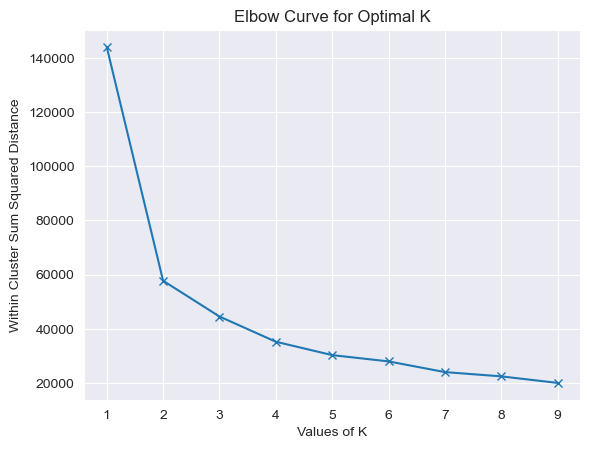

In [22]:
wcssd = [] # Within-Cluster-Sum-Squared-Distance
nr_clus = range(1,10) # Number of Clusters
for k in nr_clus:
    kmeans = kmclus(n_clusters=k, init='random', random_state=123) 
    kmeans.fit(train_df_subset)
    wcssd.append(kmeans.inertia_)
plt.plot(nr_clus, wcssd, marker='x')
plt.xlabel('Values of K') 
plt.ylabel('Within Cluster Sum Squared Distance') 
plt.title('Elbow Curve for Optimal K')
plt.show()

In [23]:
k2mcluster = kmclus(n_clusters=2, init='random', random_state=231)
k2m_cluster_model = k2mcluster.fit_predict(train_df_subset); k2m_cluster_model

C:\Users\tanma\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([0, 0, 0, ..., 0, 1, 0])

In [24]:
sscore_k2mcluster = sscore(train_df_subset, k2m_cluster_model) 
sscore_k2mcluster

0.631850062032999

In [25]:
dbscore_k2mcluster = dbscore(train_df_subset, k2m_cluster_model); dbscore_k2mcluster

0.5563691824054391

In [26]:
k3mcluster = kmclus(n_clusters=3, init='random', random_state=312)
k3m_cluster_model = k3mcluster.fit_predict(train_df_subset); k3m_cluster_model

C:\Users\tanma\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([2, 2, 0, ..., 0, 1, 0])

In [27]:
sscore_k3mcluster = sscore(train_df_subset, k3m_cluster_model); sscore_k3mcluster

0.41516491762785457

In [28]:
dbscore_k3mcluster = dbscore(train_df_subset, k3m_cluster_model); dbscore_k3mcluster

0.9889851979443322

In [29]:
k4mcluster = kmclus(n_clusters=4, init='random', random_state=231)
k4m_cluster_model = k4mcluster.fit_predict(train_df_subset); k4m_cluster_model

C:\Users\tanma\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([0, 1, 2, ..., 2, 3, 2])

In [30]:
sscore_k4mcluster = sscore(train_df_subset, k4m_cluster_model); sscore_k4mcluster

0.4886741275052207

In [31]:
dbscore_k4mcluster = dbscore(train_df_subset, k4m_cluster_model); dbscore_k4mcluster

0.9037196857589749

In [32]:
train_df_subset_kmcluster = train_df_subset.copy()
train_df_subset_kmcluster['CustomerID_index'] = train_df_subset.index.values
train_df_subset_kmcluster['Cluster_Number'] = k2m_cluster_model 
train_df_subset_kmcluster.sort_values('Cluster_Number', inplace=True); train_df_subset_kmcluster

,SRHighFloor,SRLowFloor,SRAccessibleRoom,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom,DistributionChannel_code,MarketSegment_code,Age_norm,LodgingRevenue_norm,OtherRevenue_norm,CustomerID_index,Cluster_Number
37675,0,0,0,0,0,0,0,1,0,0,0,0,0,3,6,0.227504,0.011033,0.011707,37675,0
32684,0,0,0,0,0,0,0,0,0,0,0,0,0,3,5,0.314092,0.008181,0.000776,32684,0
20880,0,0,0,0,0,0,0,0,0,0,0,0,0,3,5,0.003396,0.012947,0.010866,20880,0
79281,0,0,0,0,0,0,0,1,0,0,0,0,0,3,5,0.001698,0.000000,0.000000,79281,0
23181,0,0,0,0,0,0,0,0,1,0,0,0,0,3,5,0.353141,0.007272,0.003946,23181,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20796,0,0,0,0,0,0,0,0,0,0,0,0,0,1,3,0.293718,0.010413,0.008551,20796,1
24183,1,0,0,0,0,0,0,0,1,0,0,0,0,1,3,0.047538,0.009256,0.005433,24183,1
72615,0,0,0,0,0,0,0,0,1,0,0,0,0,1,3,0.397284,0.050452,0.016623,72615,1
33879,0,0,0,0,0,0,0,0,0,0,0,0,0,1,3,0.402377,0.085499,0.050684,33879,1


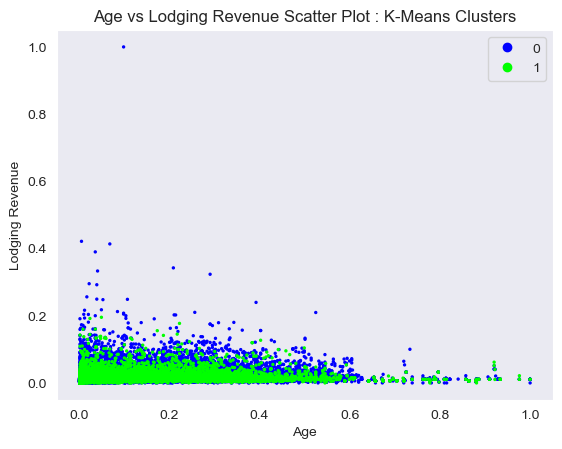

In [33]:
cluster_labels = list(train_df_subset_kmcluster['Cluster_Number'].unique())
scatter_plot = plt.scatter(x=train_df_subset['Age_norm'], y=train_df_subset['LodgingRevenue_norm'], c=train_df_subset_kmcluster['Cluster_Number'], cmap='brg', s = 2)
plt.legend(handles=scatter_plot.legend_elements()[0], labels=cluster_labels)
plt.xlabel('Age')
plt.ylabel('Lodging Revenue')
plt.title('Age vs Lodging Revenue Scatter Plot : K-Means Clusters')
plt.grid()
plt.show()

##### Test Dataset

In [34]:
test_df_subset = test_df[['SRHighFloor', 'SRLowFloor', 'SRAccessibleRoom', 'SRMediumFloor',
       'SRBathtub', 'SRShower', 'SRCrib', 'SRKingSizeBed', 'SRTwinBed',
       'SRNearElevator', 'SRAwayFromElevator', 'SRNoAlcoholInMiniBar',
       'SRQuietRoom', 'DistributionChannel_code', 'MarketSegment_code', 'Age_norm','LodgingRevenue_norm', 'OtherRevenue_norm']]

C:\Users\tanma\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\tanma\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\tanma\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\tanma\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\tanma\anaconda3\lib\site-packages\sklearn\clust

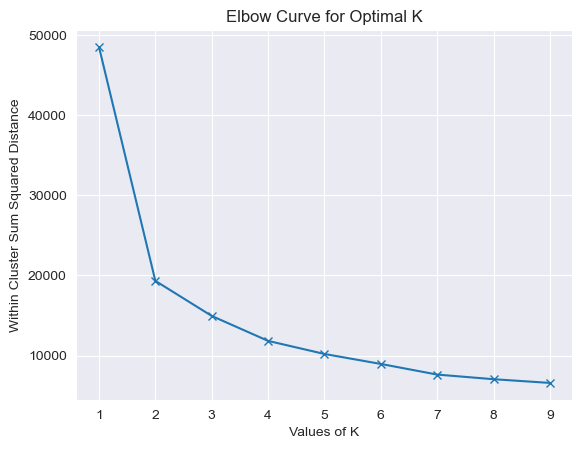

In [35]:
wcssd = [] # Within-Cluster-Sum-Squared-Distance
nr_clus = range(1,10) # Number of Clusters
for k in nr_clus:
    kmeans = kmclus(n_clusters=k, init='random', random_state=123) 
    kmeans.fit(test_df_subset)
    wcssd.append(kmeans.inertia_)
plt.plot(nr_clus, wcssd, marker='x')
plt.xlabel('Values of K') 
plt.ylabel('Within Cluster Sum Squared Distance') 
plt.title('Elbow Curve for Optimal K')
plt.show()

In [36]:
km_2cluster = kmclus(n_clusters=2, init='random', random_state=222)
km_2cluster_model = km_2cluster.fit_predict(test_df_subset); km_2cluster_model

C:\Users\tanma\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([1, 0, 0, ..., 1, 1, 0])

In [37]:
sscore_km_2cluster = sscore(test_df_subset, km_2cluster_model); sscore_km_2cluster

0.631195044937192

In [38]:
dbscore_km_2cluster = dbscore(test_df_subset, km_2cluster_model); dbscore_km_2cluster

0.5586891642846176

In [39]:
km_3cluster = kmclus(n_clusters=3, init='random', random_state=333)
km_3cluster_model = km_3cluster.fit_predict(test_df_subset); km_3cluster_model

C:\Users\tanma\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([0, 1, 2, ..., 0, 0, 2])

In [40]:
sscore_km_3cluster = sscore(test_df_subset, km_3cluster_model); sscore_km_3cluster

0.41527149074065983

In [41]:
dbscore_km_3cluster = dbscore(test_df_subset, km_3cluster_model); dbscore_km_3cluster

0.9896962602062814

In [42]:
test_df_subset_kmcluster = test_df_subset.copy()
test_df_subset_kmcluster['CustomerID_index'] = test_df_subset.index.values
test_df_subset_kmcluster['Cluster_Number'] = km_2cluster_model 
test_df_subset_kmcluster.sort_values('Cluster_Number', inplace=True); test_df_subset_kmcluster

,SRHighFloor,SRLowFloor,SRAccessibleRoom,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom,DistributionChannel_code,MarketSegment_code,Age_norm,LodgingRevenue_norm,OtherRevenue_norm,CustomerID_index,Cluster_Number
20979,1,0,0,0,0,0,0,0,0,0,0,0,0,3,5,0.006791,0.046760,0.030271,20979,0
66991,0,0,0,0,0,0,0,1,0,0,0,0,0,3,5,0.466893,0.031404,0.012807,66991,0
76779,0,0,0,0,0,0,0,0,0,0,0,0,1,3,5,0.001698,0.000000,0.000000,76779,0
22793,0,0,0,0,0,0,0,0,1,0,0,0,0,3,5,0.003396,0.019283,0.008797,22793,0
72996,0,0,0,0,0,0,0,1,0,0,0,0,1,3,5,0.100170,0.014600,0.009314,72996,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1241,0,0,0,0,0,0,0,1,0,0,0,0,0,1,3,0.001698,0.000000,0.000000,1241,1
11762,0,0,0,0,0,0,0,1,0,0,0,0,0,1,3,0.005093,0.005808,0.009055,11762,1
122,0,0,0,0,0,0,1,1,0,0,0,0,0,1,3,0.005093,0.018571,0.061227,122,1
53455,0,0,0,0,0,0,0,0,0,0,0,0,0,1,3,0.001698,0.000000,0.000000,53455,1


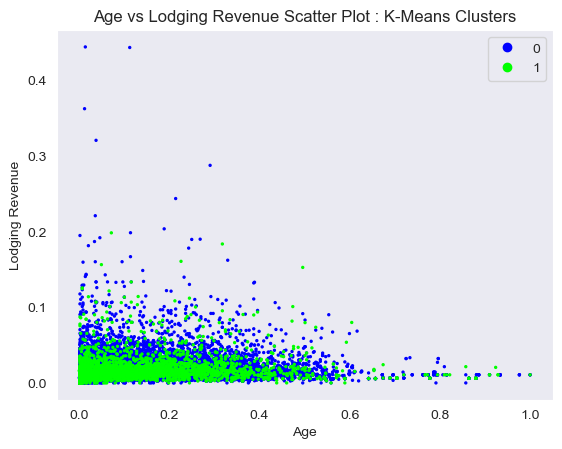

In [43]:
cluster_labels = list(test_df_subset_kmcluster['Cluster_Number'].unique())
scatter_plot = plt.scatter(x=test_df_subset['Age_norm'], y=test_df_subset['LodgingRevenue_norm'], c=test_df_subset_kmcluster['Cluster_Number'], cmap='brg', s = 2)
plt.legend(handles=scatter_plot.legend_elements()[0], labels=cluster_labels)
plt.xlabel('Age')
plt.ylabel('Lodging Revenue')
plt.title('Age vs Lodging Revenue Scatter Plot : K-Means Clusters')
plt.grid()
plt.show()

#### OBSERVATIONS

__1. For train dataset__, 

a. Silhouette Score : K=2 Cluster (0.63) > K=4 Cluster (0.49) > K=3 Cluster (0.42) 
    => K=2 is more appropriate 

b. Davies-Bouldin Score : K=2 Cluster (0.56) < K=4 Cluster (0.90) < K=3 Cluster (0.99)
    => K=2 is more appropriate
    
_Appropriate Number of Clusters : 2_ (Based on Silhouette Score & Davies-Bouldin Score)

__2. For test dataset__, 

a. Silhouette Score : K=2 Cluster (0.63) >  K=3 Cluster (0.42) 
    => K=2 is more appropriate 

b. Davies-Bouldin Score : K=2 Cluster (0.56) < K=3 Cluster (0.99)
    => K=2 is more appropriate
    
_Appropriate Number of Clusters : 2_ (Based on Silhouette Score & Davies-Bouldin Score)


#### MANAGERIAL IMPLICATIONS

The managerial implication of the results is that the data can be clustered into two groups based on the Silhouette Score and Davies-Bouldin Score. This information can be useful for managers who are interested in understanding the characteristics of their customers or identifying segments of their market. By clustering customers into two groups, managers can develop targeted marketing strategies that are more effective in meeting the needs of each group.

For instance, a manager can create two groups of customers with different characteristics based on the cluster analysis. The manager can then analyze the characteristics of each group to understand what makes them different, and develop marketing strategies that are tailored to the needs of each group. 

The manager can also use this information to allocate resources more efficiently, such as assigning customer service representatives to each group based on their needs. 

## XG BOOST

##### Train Dataset

In [44]:
train_df_dt = train_df_subset_kmcluster.copy()

In [45]:
train_df_dt.columns

Index(['SRHighFloor', 'SRLowFloor', 'SRAccessibleRoom', 'SRMediumFloor',
       'SRBathtub', 'SRShower', 'SRCrib', 'SRKingSizeBed', 'SRTwinBed',
       'SRNearElevator', 'SRAwayFromElevator', 'SRNoAlcoholInMiniBar',
       'SRQuietRoom', 'DistributionChannel_code', 'MarketSegment_code',
       'Age_norm', 'LodgingRevenue_norm', 'OtherRevenue_norm',
       'CustomerID_index', 'Cluster_Number'],
      dtype='object')

In [46]:
hotel_input = train_df_dt[['SRHighFloor', 'SRLowFloor', 'SRAccessibleRoom',
       'SRMediumFloor', 'SRBathtub', 'SRShower', 'SRCrib', 'SRKingSizeBed',
       'SRTwinBed', 'SRNearElevator', 'SRAwayFromElevator',
       'SRNoAlcoholInMiniBar', 'SRQuietRoom', 'DistributionChannel_code',
       'MarketSegment_code', 'Age_norm', 'LodgingRevenue_norm',
       'OtherRevenue_norm']]
hotel_output = train_df_dt [['Cluster_Number']]

In [47]:
hotel_inputs_names = hotel_input.columns
hotel_output_labels = hotel_output['Cluster_Number'].unique().astype(str)
hotel_output_labels

array(['0', '1'], dtype='<U11')

##### Test Dataset

In [54]:
test_df_dt = test_df_subset_kmcluster.copy()

In [55]:
test_df_dt.columns

Index(['SRHighFloor', 'SRLowFloor', 'SRAccessibleRoom', 'SRMediumFloor',
       'SRBathtub', 'SRShower', 'SRCrib', 'SRKingSizeBed', 'SRTwinBed',
       'SRNearElevator', 'SRAwayFromElevator', 'SRNoAlcoholInMiniBar',
       'SRQuietRoom', 'DistributionChannel_code', 'MarketSegment_code',
       'Age_norm', 'LodgingRevenue_norm', 'OtherRevenue_norm',
       'CustomerID_index', 'Cluster_Number'],
      dtype='object')

In [167]:
test_df_dt.shape

(20898, 20)

In [128]:
hotel_input1 = test_df_dt[['SRHighFloor', 'SRLowFloor', 'SRAccessibleRoom',
       'SRMediumFloor', 'SRBathtub', 'SRShower', 'SRCrib', 'SRKingSizeBed',
       'SRTwinBed', 'SRNearElevator', 'SRAwayFromElevator',
       'SRNoAlcoholInMiniBar', 'SRQuietRoom', 'DistributionChannel_code',
       'MarketSegment_code', 'Age_norm', 'LodgingRevenue_norm',
       'OtherRevenue_norm']]
hotel_output1 = test_df_dt [['Cluster_Number']]

In [129]:
hotel_inputs_names = hotel_input.columns
hotel_output_labels = hotel_output['Cluster_Number'].unique().astype(str)
hotel_output_labels

array(['0', '1'], dtype='<U11')

In [137]:
# 0.0
# For skopt routines
! pip install scikit-optimize

# 0.1 For plotting skopt results
! pip install 'scikit-optimize[plots]'

!pip install xgboost


ERROR: Invalid requirement: "'scikit-optimize[plots]'"


In [138]:
# 1.0 Clear ipython memory
#%reset -f

# 1.1 Data manipulation and plotting modules
import numpy as np
import pandas as pd


# 1.2 Data pre-processing
#     z = (x-mean)/stdev
from sklearn.preprocessing import StandardScaler as ss

# 1.3 Dimensionality reduction and noise removal
from sklearn.decomposition import PCA

# 1.4 Data splitting and model parameter search
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold

# 1.5 Model pipelining
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline

# 1.6 Hyperparameter optimization
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

# 1.7.1
#     pip install scikit-optimize
#     pip install 'scikit-optimize[plots]'
#     Refer: https://github.com/scikit-optimize/scikit-optimize
#     conda install -c conda-forge scikit-optimize
from skopt import BayesSearchCV
from skopt.space import Real, Categorical, Integer

# 1.8 Modeling modules
#     Call sklearn wrapper of xgboost
# """Scikit-Learn Wrapper interface for XGBoost."""
#  """Implementation of the Scikit-Learn API for XGBoost.
# https://xgboost.readthedocs.io/en/latest/python/python_api.html#module-xgboost.sklearn
# Stackoverflow:
# https://stackoverflow.com/a/34696477
# https://stackoverflow.com/a/46947191
# Install as: conda install -c anaconda py-xgboost
from xgboost.sklearn import XGBClassifier

In [139]:
# 1.9 Model evaluation metrics
from sklearn.metrics import accuracy_score, f1_score
#from sklearn.metrics import plot_roc_curve
from sklearn.metrics import confusion_matrix

from sklearn.model_selection import GridSearchCV


# 1.10
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import plot_importance

# 1.11 Permutation feature importance
from sklearn.inspection import permutation_importance

In [140]:
# 1.12 Misc
import time
import os
import gc
import random

# 1.13 Used in Randomized parameter search
from scipy.stats import uniform

In [141]:
# 1.14
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [142]:
# Defining the Input and the target
X = hotel_input
X.head(2)


print("\n\nTarget,y, values")
y = hotel_output
y.head()

,SRHighFloor,SRLowFloor,SRAccessibleRoom,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom,DistributionChannel_code,MarketSegment_code,Age_norm,LodgingRevenue_norm,OtherRevenue_norm
20979,1,0,0,0,0,0,0,0,0,0,0,0,0,3,5,0.006791,0.046760,0.030271
66991,0,0,0,0,0,0,0,1,0,0,0,0,0,3,5,0.466893,0.031404,0.012807




Target,y, values


,Cluster_Number
20979,0
66991,0
76779,0
22793,0
72996,0


In [143]:
# Splitting the data in to Train and test
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.35,
                                                    shuffle = True,
                                                    stratify = y
                                                    )

# 4.1
X_train.shape        # (65025, 30)
X_test.shape         # (35014, 30)
y_train.shape        # (65025,)
y_test.shape         # (35014,)

(13583, 18)

(7315, 18)

(13583, 1)

(7315, 1)

In [144]:
# Create a pipeline with preprocessing steps and the estimator

pipeline = Pipeline([

    ('sts', ss()),

    ('pca', PCA()),

    ('classifier', XGBClassifier())  # Use the correct estimator

])
# Define the parameter grid

param_grid = {

    'classifier__n_estimators': [50, 100, 200],

    'classifier__max_depth': [None, 10, 20],

    # other parameters

}

# Create the GridSearchCV object

grid_search = GridSearchCV(pipeline, param_grid, cv=5)
 

# Fit the grid search to your data

grid_search.fit(X_train, y_train)

 
# Access the best score and best parameters

best_score = grid_search.best_score_

best_params = grid_search.best_params_


print(f"Best score: {best_score}")

print(f"Best parameter set: {best_params}")

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('sts', StandardScaler()),
                                       ('pca', PCA()),
                                       ('classifier',
                                        XGBClassifier(base_score=None,
                                                      booster=None,
                                                      callbacks=None,
                                                      colsample_bylevel=None,
                                                      colsample_bynode=None,
                                                      colsample_bytree=None,
                                                      early_stopping_rounds=None,
                                                      enable_categorical=False,
                                                      eval_metric=None,
                                                      feature_types=None,
                                                      gamma=None, gpu_id=None,
                                                      grow_policy=None,...
                                                      max_bin=None,
                                                      max_cat_threshold=None,
                                                      max_cat_to_onehot=None,
                                                      max_delta_step=None,
                                                      max_depth=None,
                                                      max_leaves=None,
                                                      min_child_weight=None,
                                                      missing=nan,
                                                      monotone_constraints=None,
                                                      n_estimators=100,
                                                      n_jobs=None,
                                                      num_parallel_tree=None,
                                                      predictor=None,
                                                      random_state=None, ...))]),
             param_grid={'classifier__max_depth': [None, 10, 20],
                         'classifier__n_estimators': [50, 100, 200]})

Best score: 0.9984540689912367
Best parameter set: {'classifier__max_depth': None, 'classifier__n_estimators': 50}


**Interpretation:**
A best score of 0.999 (or 99.9%) suggests that the model has performed exceptionally well on the training data. 

In [159]:
print("\n\n--Takes time...---\n")
start = time.time()
pipeline.fit(X_train, y_train)
end = time.time()
print()
time_taken_minutes = (end - start) / 60
print("Time taken:", time_taken_minutes, "minutes")



--Takes time...---



Pipeline(steps=[('sts', StandardScaler()), ('pca', PCA()),
                ('classifier',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, gamma=None, gpu_id=None,
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, n_estimators=100,
                               n_jobs=None, num_parallel_tree=None,
                               predictor=None, random_state=None, ...))])


Time taken: 0.008524870872497559 minutes


In [146]:
# 7.4. Make predictions using the best returned model
y_pred = grid_search.predict(X_test)
print("--Few predictions--\n")
y_pred[:4]



--Few predictions--



array([1, 0, 1, 0])

In [147]:
# 7.5 Accuracy score
print("\n\n--Accuracy Score--\n")
accuracy = accuracy_score(y_test, y_pred)
accuracy * 100.0             



--Accuracy Score--



99.90430622009569

**Interpretation:**
It suggests that the model is making accurate predictions for the majority of the instances in the test set

In [148]:
# 7.7 F1 score
print("\n\n--F1 Score pos-label: 1--\n")
f1_score(y_test,y_pred, pos_label = 1)      

print("\n\n--F1 Score pos-label: 0--\n")
f1_score(y_test,y_pred, pos_label = 0)      



--F1 Score pos-label: 1--



0.9973353635325466



--F1 Score pos-label: 0--



0.9994168124635509

**Interpretation:**

Positive Class:
F1 Score: 0.996958174904943
This score suggests that the model is very effective at correctly classifying instances belonging to Cluster 1 (positive class), while minimizing false positives and false negatives.

Negative Class (Cluster 0):
F1 Score: 0.9993333333333333
Similarly, for Cluster 0 (negative class), the model demonstrates high precision and recall, resulting in a near-perfect F1 score.

In [149]:
# 7.9 Get feature importances from GridSearchCV best fitted 'xg' model

print("\n\n--How many features--\n")
grid_search.best_estimator_.named_steps["classifier"].feature_importances_.shape

# 7.9.1
print("\n\n---Feature importances---\n")
grid_search.best_estimator_.named_steps["classifier"].feature_importances_



--How many features--



(18,)



---Feature importances---



array([0.899758  , 0.0236555 , 0.00703871, 0.00362585, 0.00899486,
       0.00222465, 0.        , 0.00167943, 0.0034327 , 0.00182796,
       0.00923116, 0.00118458, 0.        , 0.00193635, 0.00201809,
       0.00389019, 0.01000656, 0.01949544], dtype=float32)

In [150]:
# 7.10 Create a dataframe of feature importances
#      with names of columns and sorted by feature-imp

colnames = X.columns.tolist()

imp_values = grid_search.best_estimator_.named_steps["classifier"].feature_importances_

df_imp = pd.DataFrame(
                      data = imp_values,
                      index = colnames,
                      columns = ["imp"]
                      ).sort_values(by = 'imp')

# 7.10.1
df_imp

,imp
SRCrib,0.000000
SRQuietRoom,0.000000
SRNoAlcoholInMiniBar,0.001185
SRKingSizeBed,0.001679
SRNearElevator,0.001828
DistributionChannel_code,0.001936
MarketSegment_code,0.002018
SRShower,0.002225
SRTwinBed,0.003433
SRMediumFloor,0.003626


In [151]:
# 7.11 First five columns with least feature importance are:

list(df_imp.index.values[:5])

['SRCrib',
 'SRQuietRoom',
 'SRNoAlcoholInMiniBar',
 'SRKingSizeBed',
 'SRNearElevator']

Test Data

In [166]:
# Defining the Input and the target
X_test1 = hotel_input1
X_test1.head(2)


print("\n\nTarget,y, values")
y_test1 = hotel_output1
y_test1.shape

,SRHighFloor,SRLowFloor,SRAccessibleRoom,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom,DistributionChannel_code,MarketSegment_code,Age_norm,LodgingRevenue_norm,OtherRevenue_norm
20979,1,0,0,0,0,0,0,0,0,0,0,0,0,3,5,0.006791,0.046760,0.030271
66991,0,0,0,0,0,0,0,1,0,0,0,0,0,3,5,0.466893,0.031404,0.012807




Target,y, values


(20898, 1)

In [168]:
# Fit the grid search to your data

grid_search.fit(X_test1, y_test1)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('sts', StandardScaler()),
                                       ('pca', PCA()),
                                       ('classifier',
                                        XGBClassifier(base_score=None,
                                                      booster=None,
                                                      callbacks=None,
                                                      colsample_bylevel=None,
                                                      colsample_bynode=None,
                                                      colsample_bytree=None,
                                                      early_stopping_rounds=None,
                                                      enable_categorical=False,
                                                      eval_metric=None,
                                                      feature_types=None,
                                                      gamma=None, gpu_id=None,
                                                      grow_policy=None,...
                                                      max_bin=None,
                                                      max_cat_threshold=None,
                                                      max_cat_to_onehot=None,
                                                      max_delta_step=None,
                                                      max_depth=None,
                                                      max_leaves=None,
                                                      min_child_weight=None,
                                                      missing=nan,
                                                      monotone_constraints=None,
                                                      n_estimators=100,
                                                      n_jobs=None,
                                                      num_parallel_tree=None,
                                                      predictor=None,
                                                      random_state=None, ...))]),
             param_grid={'classifier__max_depth': [None, 10, 20],
                         'classifier__n_estimators': [50, 100, 200]})

In [169]:
print("\n\n--Takes time...---\n")
start = time.time()
pipeline.fit(X_test1,y_test1)
end = time.time()
print()
time_taken_minutes = (end - start) / 60
print("Time taken:", time_taken_minutes, "minutes")



--Takes time...---



Pipeline(steps=[('sts', StandardScaler()), ('pca', PCA()),
                ('classifier',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, gamma=None, gpu_id=None,
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, n_estimators=100,
                               n_jobs=None, num_parallel_tree=None,
                               predictor=None, random_state=None, ...))])


Time taken: 0.015345807870229084 minutes


In [172]:
# 7.4. Make predictions using the best returned model
y_pred1 = grid_search.predict(X_test1)
print("--Few predictions--\n")
y_pred1[:4]



--Few predictions--



array([0, 0, 0, 0])

In [173]:
# 7.5 Accuracy score
print("\n\n--Accuracy Score--\n")
accuracy = accuracy_score(y_test1, y_pred1)
accuracy * 100.0             



--Accuracy Score--



100.0

In [176]:
# 7.7 F1 score
print("\n\n--F1 Score pos-label: 1--\n")
f1_score(y_test1,y_pred1, pos_label = 1)      

print("\n\n--F1 Score pos-label: 0--\n")
f1_score(y_test1,y_pred1, pos_label = 0)      



--F1 Score pos-label: 1--



1.0



--F1 Score pos-label: 0--



1.0

In [175]:
# 7.9 Get feature importances from GridSearchCV best fitted 'xg' model

print("\n\n--How many features--\n")
grid_search.best_estimator_.named_steps["classifier"].feature_importances_.shape

# 7.9.1
print("\n\n---Feature importances---\n")
grid_search.best_estimator_.named_steps["classifier"].feature_importances_



--How many features--



(18,)



---Feature importances---



array([8.8204771e-01, 2.3400990e-02, 5.0840271e-03, 4.2390343e-04,
       4.4363020e-03, 1.0458769e-03, 8.0182487e-03, 9.8849516e-03,
       6.6303527e-03, 1.2675776e-04, 2.1279530e-04, 5.3075841e-03,
       6.2640640e-05, 5.0886098e-05, 5.8361110e-03, 1.7559630e-03,
       1.3044274e-03, 4.4370398e-02], dtype=float32)

In [178]:
# 7.10 Create a dataframe of feature importances
#      with names of columns and sorted by feature-imp

colnames = X_test1.columns.tolist()

imp_values = grid_search.best_estimator_.named_steps["classifier"].feature_importances_

df_imp1 = pd.DataFrame(
                      data = imp_values,
                      index = colnames,
                      columns = ["imp"]
                      ).sort_values(by = 'imp')

# 7.10.1
df_imp1

,imp
DistributionChannel_code,0.000051
SRQuietRoom,0.000063
SRNearElevator,0.000127
SRAwayFromElevator,0.000213
SRMediumFloor,0.000424
SRShower,0.001046
LodgingRevenue_norm,0.001304
Age_norm,0.001756
SRBathtub,0.004436
SRAccessibleRoom,0.005084


In [179]:
# 7.11 First five columns with least feature importance are:

list(df_imp1.index.values[:5])

['DistributionChannel_code',
 'SRQuietRoom',
 'SRNearElevator',
 'SRAwayFromElevator',
 'SRMediumFloor']

**Interpretation:**
Features "SRHighFloor," "SRLowFloor," and "OtherRevenue_norm" consistently demonstrate strong influence across both train and test datasets.
"DistributionChannel_code," "SRQuietRoom," and "SRNearElevator" maintain relatively lower importance in both datasets, suggesting limited impact.

# Logistic Regression

In [180]:
# import the class
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression(random_state=16)
y = train_df_dt [['Cluster_Number']]
x = train_df_dt[['DistributionChannel_code',
       'MarketSegment_code', 'Age_norm', 'LodgingRevenue_norm',
       'OtherRevenue_norm']]
x_test = test_df_dt[['DistributionChannel_code',
       'MarketSegment_code', 'Age_norm', 'LodgingRevenue_norm',
       'OtherRevenue_norm']]
y_test = test_df_dt [['Cluster_Number']]

# fit the model with data
logreg.fit(x, y)

C:\Users\tanma\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(random_state=16)

In [181]:
y_pred = logreg.predict(x_test)

In [182]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[17138,     0],
       [    0,  3760]], dtype=int64)

([<matplotlib.axis.XTick at 0x2042265d900>,
 [Text(0, 0, '0'), Text(1, 0, '1')])

([<matplotlib.axis.YTick at 0x2042265c310>,
 [Text(0, 0, '0'), Text(0, 1, '1')])

<Axes: >

Text(0.5, 1.1, 'Confusion matrix')

Text(52.722222222222214, 0.5, 'Actual label')

Text(0.5, 427.9555555555555, 'Predicted label')

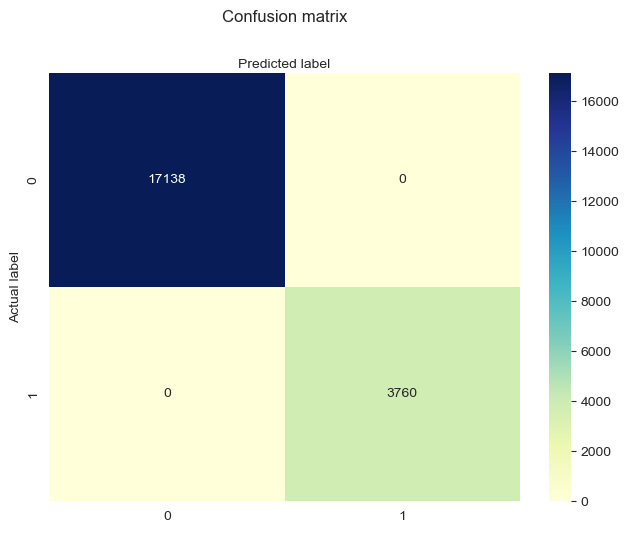

In [183]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')


In [184]:
from sklearn.metrics import classification_report
target_names = ['Cluster 0', 'Cluster 1']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

   Cluster 0       1.00      1.00      1.00     17138
   Cluster 1       1.00      1.00      1.00      3760

    accuracy                           1.00     20898
   macro avg       1.00      1.00      1.00     20898
weighted avg       1.00      1.00      1.00     20898



#### OBSERVATION 

The model seems to be performing very well with an accuracy of 1.0, which means that all of the predicted classes match the true classes.

The precision and recall values for both clusters are also 1.0, indicating that the model has correctly classified all of the instances of both clusters. The F1-score is also 1.0 for both clusters, which is the harmonic mean of precision and recall.

Overall, the model has performed very well and is a good fit for the data.

__Further, the result obtained by predicting the outcome for the test dataset from both the decision tree and the logistic regression are in line with each other. Thus, indicating that the model formed worked perfectly.__

*** THE END ***